In [22]:
# Preprocessing Temporal and Weather Features 
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [23]:
#data load
bikesharing = pd.read_csv("./Data/hour.csv")   

In [24]:
season_mapping = {1:"winter", 2:"spring", 3:"summer", 4:"fall"}
yr_mapping = {0: "2011", 1:"2012"}
mnth_mapping = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
weekday_mapping={0: 'Sunday', 1: 'Monday', 2: 'Tuesday',3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
weather_mapping={1:"Clear",2:"Misty",3:"Light Snow/Rain",4:"Heavy Snow/Rain"}


In [25]:
bikesharing['season']=bikesharing['season'].apply(lambda x: season_mapping[x])
bikesharing['yr']=bikesharing['yr'].apply(lambda x: yr_mapping[x])
bikesharing['mnth']=bikesharing['mnth'].apply(lambda x: mnth_mapping[x])
bikesharing['weekday']=bikesharing['weekday'].apply(lambda x: weekday_mapping[x])
bikesharing['weathersit']=bikesharing['weathersit'].apply(lambda x: weather_mapping[x])

#bikesharing.sample(100)


In [26]:
#registered vs casual analysis
#plotting distributions 
sns.distplot(bikesharing['casual'],label="Causal")
sns.distplot(bikesharing['registered'],label="Registered")
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions")
plt.savefig('figs/rides_distributions.png', format='png')


TypeError: 'str' object is not callable

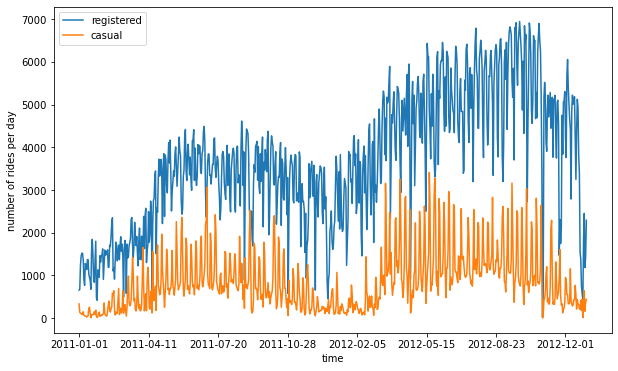

In [27]:
# plot evolution of rides over time
plot_data=bikesharing[['dteday','registered','casual']]
ax=plot_data.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("time")
ax.set_ylabel("number of rides per day")
plt.savefig('figs/rides_daily.png', format='png')

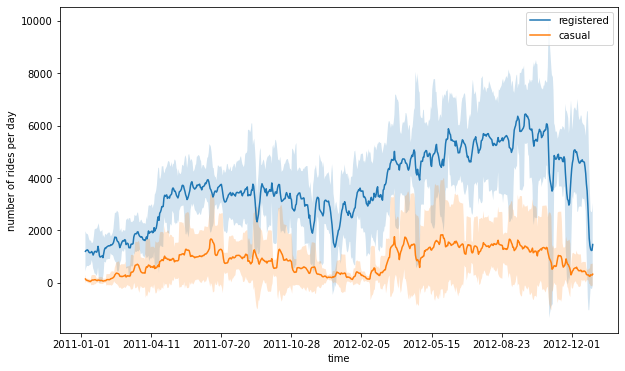

In [28]:
# plot smoothed time series based on a rolling window
plot_data = bikesharing[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()
"""
Create a plot of the series, where we first plot the series of rolling means, then we color the zone between the series of rolling means +- 2 rolling standard deviations
"""
ax = rolling_means.plot(figsize=(10,6))
ax.fill_between(rolling_means.index, rolling_means['registered'] + 2*rolling_deviations['registered']
, rolling_means['registered'] - 2*rolling_deviations['registered'], alpha = 0.2)

ax.fill_between(rolling_means.index, rolling_means['casual'] + 2*rolling_deviations['casual']
, rolling_means['casual'] - 2*rolling_deviations['casual'], alpha = 0.2)

ax.set_xlabel("time");

ax.set_ylabel("number of rides per day");

plt.savefig('figs/rides_aggregated.png', format='png')

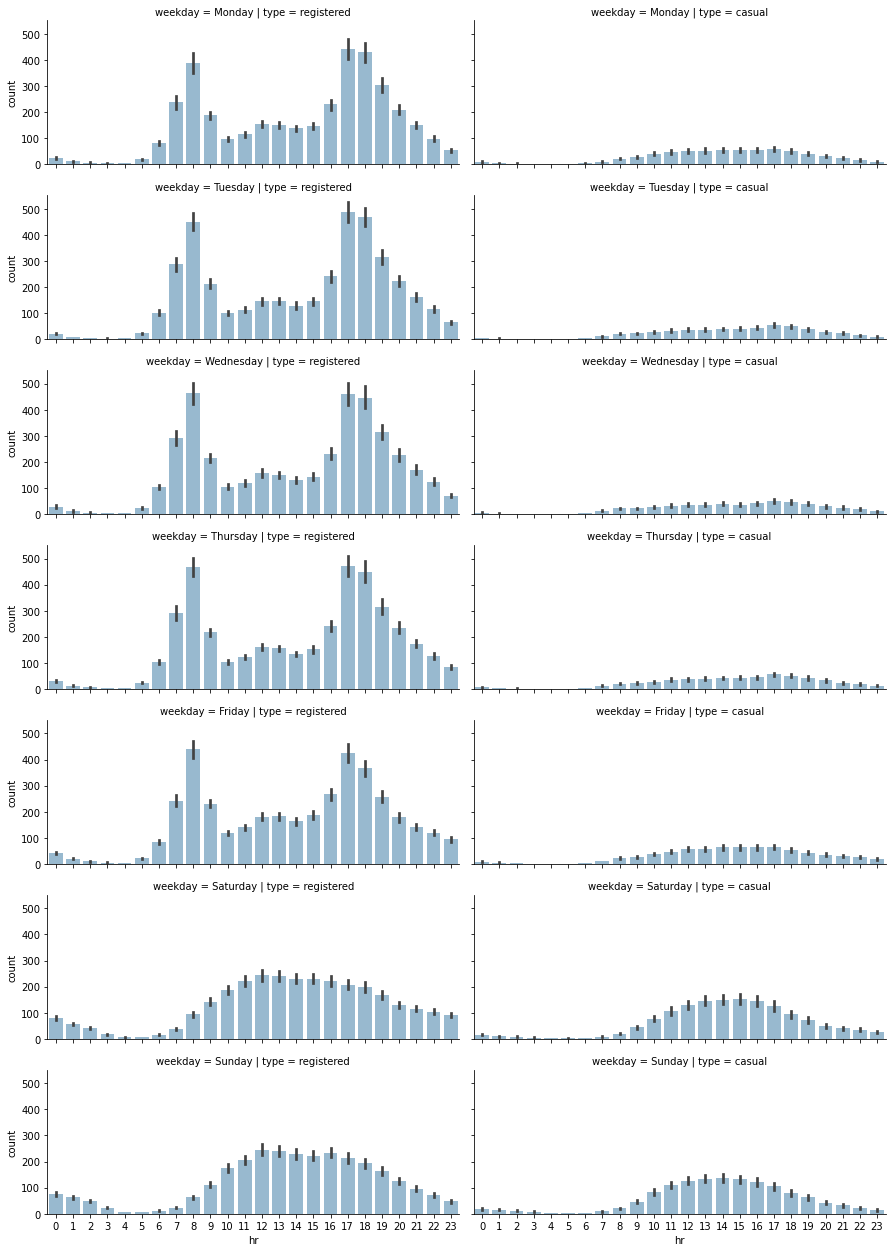

In [29]:
# distribution of bike rides during a day and then during days of a week
plot_data=bikesharing[['hr','weekday','registered','casual']]
plot_data=plot_data.melt(id_vars=['hr','weekday'],var_name='type',value_name='count')
# define FacetGrid
grid = sns.FacetGrid(plot_data, row='weekday',col='type', height=2.5, aspect=2.5,row_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday',                    'Friday', 'Saturday', 'Sunday'])
# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
grid.savefig('figs/weekday_hour_distributions.png', format='png')

Analysing the seasonal impact on the rides 

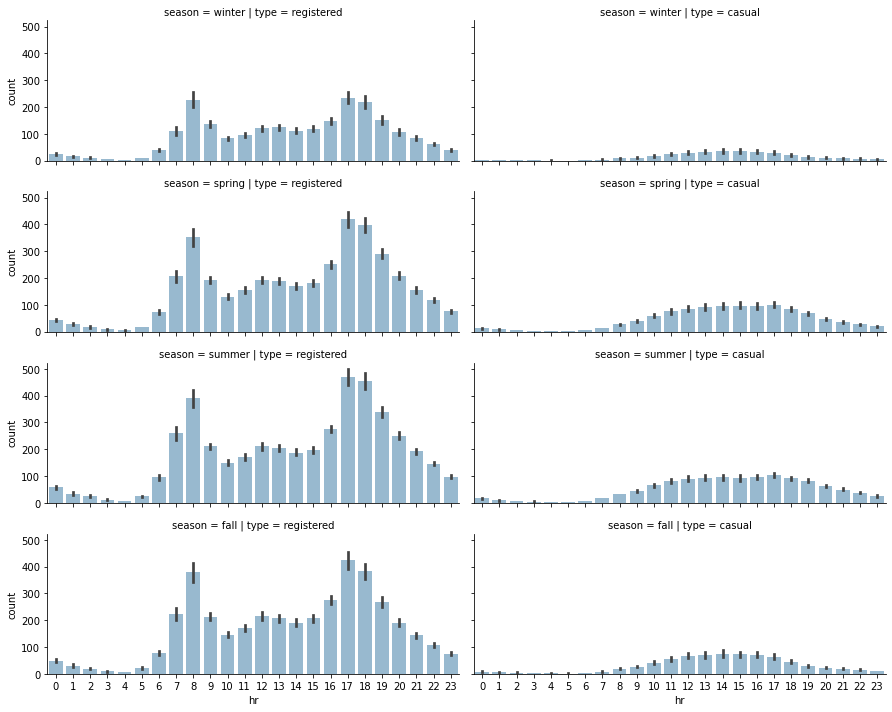

In [30]:
# distribution of rides by season by hour
plot_data= bikesharing[['hr','season','registered','casual']]
plot_data=plot_data.melt(id_vars=['hr','season'],var_name='type',value_name='count')
grid=sns.FacetGrid(plot_data,row='season',row_order=['winter','spring','summer','fall'],col='type', height=2.5, aspect=2.5)
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
grid.savefig('figs/exercise1.02_DistByHrBySeason.png', format='png')


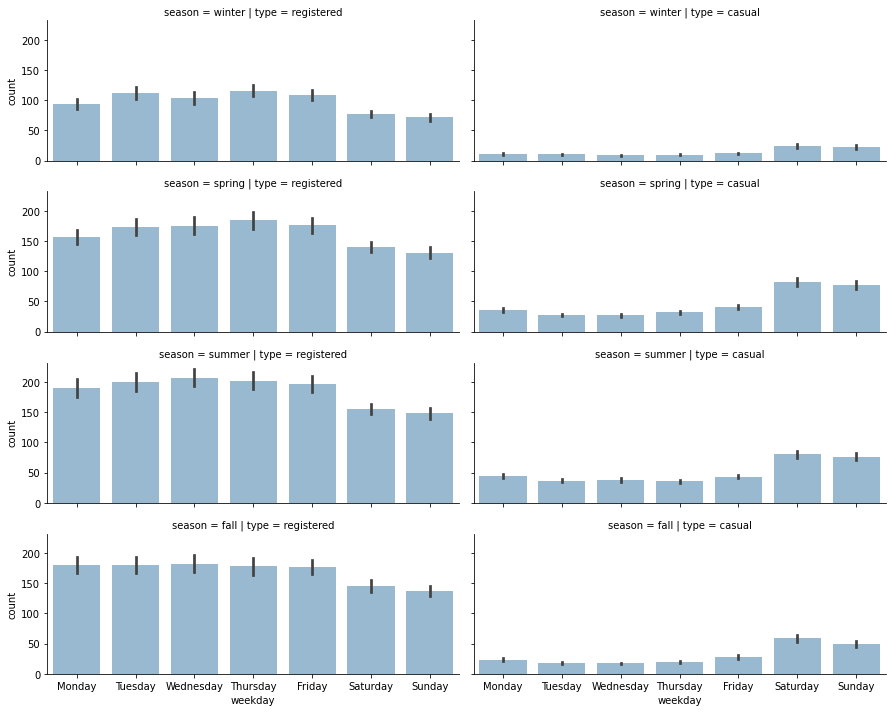

In [31]:
# distribution of rides by season by weekday
plot_data= bikesharing[['season','weekday','registered','casual']]
plot_data=plot_data.melt(id_vars=['weekday','season'],var_name='type',value_name='count')
grid=sns.FacetGrid(plot_data,row='season',row_order=['winter','spring','summer','fall'],col='type', height=2.5, aspect=2.5)
grid.map(sns.barplot, 'weekday', 'count', alpha=0.5,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
grid.savefig('figs/exercise1.02_DistByDayOfWeekBySeason.png', format='png')


Hypothesis testing to determine if there is a statistical difference between the registered riders on weekends vs week days.
H0 = Average Registered Riders WeekDays-Average Registered Weekend = 0 (uRWd-uRWe=0)
H1=Average Registered Riders WeekDays-Average Registered Weekend <> 0 (uRWd-uRWe<>0) $\mu$


In [41]:
weekends=['Saturday','Sunday']
weekend_masks=bikesharing['weekday'].isin(weekends)
weekday_masks=~bikesharing['weekday'].isin(weekends)

weekend_registereddata=bikesharing.registered[weekend_masks]
weekday_registereddata=bikesharing.registered[weekday_masks]

weekend_casualdata=bikesharing.casual[weekend_masks]
weekday_casualdata=bikesharing.casual[weekday_masks]


In [42]:
#t tests
from scipy.stats import ttest_ind
testresult=ttest_ind(weekend_registereddata,weekday_registereddata)
print(f"Registered Users : Statistic value: {testresult[0]:.05f},p-value: {testresult[1]:.05f}")

testresult=ttest_ind(weekend_casualdata,weekday_casualdata)
print(f"Casual Users : Statistic value: {testresult[0]:.05f},p-value: {testresult[1]:.05f}")

Registered Users : Statistic value: -16.00363,p-value: 0.00000
Casual Users : Statistic value: 41.07674,p-value: 0.00000


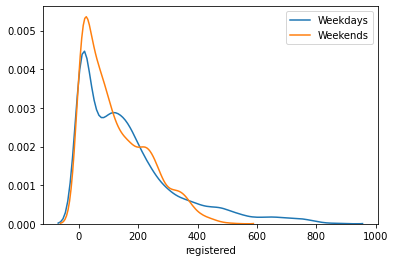

In [39]:
sns.distplot(weekday_registereddata,label='Weekdays',hist=False)
sns.distplot(weekend_registereddata,label='Weekends',hist=False)
plt.legend()
plt.xlabel="Rides"
plt.ylabel="Frequency"
plt.title= "Distribution of Registered Riders during weekedays and weekends"
plt.savefig("figs/1.01_DistRegisteredRidersWeekdaysWeekends.png",format="png")


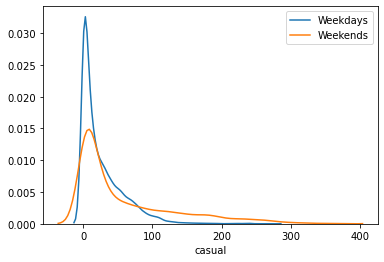

In [43]:
sns.distplot(weekday_casualdata,label='Weekdays',hist=False)
sns.distplot(weekend_casualdata,label='Weekends',hist=False)
plt.legend()
plt.xlabel="Rides"  
plt.ylabel="Frequency"
plt.title= "Distribution of Registered Riders during weekedays and weekends"
plt.savefig("figs/1.01_DistCasualRidersWeekdaysWeekends.png",format="png")

In [35]:
bikesharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
#plotting correaltions both pearson and spearman